<a href="https://colab.research.google.com/github/wathsala-vishwajith/ML-Playground/blob/main/Assignment_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data" -P "/content/drive/My Drive/app"
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names" -P "/content/drive/My Drive/app"

--2022-07-16 17:16:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘/content/drive/My Drive/app/auto-mpg.data.1’

auto-mpg.data.1     100%[===================>]  29.58K  --.-KB/s    in 0.07s   

2022-07-16 17:16:34 (426 KB/s) - ‘/content/drive/My Drive/app/auto-mpg.data.1’ saved [30286/30286]

--2022-07-16 17:16:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1660 (1.6K) [application/x-httpd-php]
Saving to: ‘/content/drive/My Drive/app/au

In [ ]:
!cat '/content/drive/My Drive/app/auto-mpg.names' 

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

In [ ]:
cols = ["mpg", "cylinders","displacement","horsepower","weight","acceleration","model","origin","car" ]
df  = pd.read_fwf('/content/drive/My Drive/app/auto-mpg.data', names=cols )
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [ ]:
df.shape

(398, 9)

In [ ]:
df.values

array([[18.0, 8, 307.0, ..., 70, 1, '"chevrolet chevelle malibu"'],
       [15.0, 8, 350.0, ..., 70, 1, '"buick skylark 320"'],
       [18.0, 8, 318.0, ..., 70, 1, '"plymouth satellite"'],
       ...,
       [32.0, 4, 135.0, ..., 82, 1, '"dodge rampage"'],
       [28.0, 4, 120.0, ..., 82, 1, '"ford ranger"'],
       [31.0, 4, 119.0, ..., 82, 1, '"chevy s-10"']], dtype=object)

Check for null data

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model           0
origin          0
car             0
dtype: int64

In [ ]:
#checking for any duplicates
df.duplicated().sum()
#dropping duplicates
# df.drop_duplicates( inplace=True)

0

In [ ]:
#for splitting data into train and test set
from sklearn.model_selection import train_test_split

#linear regression model
from sklearn.linear_model import LinearRegression

#metrics for evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [ ]:
import math
median_horsepwr = math.floor(df.horsepower.median())
df.horsepower = df.horsepower.fillna(median_horsepwr)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,"""ford ranger"""


In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model             int64
origin            int64
car              object
dtype: object

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [ ]:
df["mpg"]

In [ ]:

df["horsepower"].isnull().sum()

0

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
car             0
dtype: int64

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
car             0
dtype: int64

In [ ]:
x = df.drop(["mpg","car","model","origin"],axis=1).values
x

array([[   8. ,  307. ,  130. , 3504. ,   12. ],
       [   8. ,  350. ,  165. , 3693. ,   11.5],
       [   8. ,  318. ,  150. , 3436. ,   11. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6],
       [   4. ,  120. ,   79. , 2625. ,   18.6],
       [   4. ,  119. ,   82. , 2720. ,   19.4]])

In [ ]:
y = df["mpg"].values
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
       19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
       13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. ,
       27. , 26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. ,
       17. , 11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. ,
       18. , 18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. ,
       22. , 18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. ,
       15. , 24. , 20. , 11. , 20. , 21. , 19. , 15. , 31. , 26. , 32. ,
       25. , 16. , 16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. ,
       26. , 31. , 32. , 28. , 24. , 26. , 24. , 26

In [ ]:
#splitting test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [ ]:
# Training the model using the training set
linear_reg_model = LinearRegression().fit(x_train, y_train)

In [ ]:
# Predicting the test set results
y_pred = linear_reg_model.predict(x_test)

## Evaluate the model

In [ ]:
#using r2 score
r2_score(y_test, y_pred)

0.7262863233847137

In [ ]:
#Using Mean Squared Error
mean_squared_error(y_test, y_pred)

14.716610997341485

In [ ]:
#Using Root Mean Squared Error
mean_squared_error(y_test, y_pred, squared = False)

3.8362235332865424

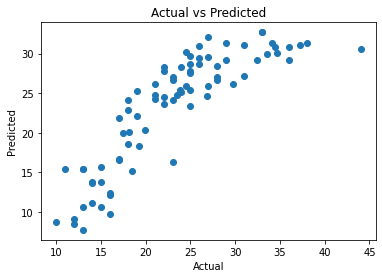

In [ ]:
#plotting the actual values vs the predicted results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()